<a href="https://colab.research.google.com/github/AFIGA97/Heart_Disease_Prediction/blob/main/heartdisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV,train_test_split,cross_val_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
import os
import warnings
warnings.filterwarnings('ignore')


<p>Now, we are uploading our data set to the data variable using the <b>read_csv</b> function in the pandas library. </p>

In [ ]:
data=pd.read_csv('heart.csv')

In [ ]:
#Now, our data is loaded. We're writing the following snippet to see the loaded data. The purpose here is to see the top five of the loaded data.

print('Data First 5 Rows Show\n')
data.head()


Data First 5 Rows Show



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
print('Data Last 5 Rows Show\n')
data.tail()

Data Last 5 Rows Show



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


<p>Both the <b>head() and tail()</b> functions have a value of 5 by default. different values should be given as parameters to change these values.</p>

In [ ]:
print('Data Show Describe\n')
data.describe()

Data Show Describe



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<p>Describe function is a function that allows analysis between the numerical values contained in the data set. Using this function count, mean, std, min, max, 25%, 50%, 75%.</p>
<p>As seen in this section, most values are generally categorized. This means that we need to integrate other values into this situation. These; age, trestbps, chol, thalach.</p>

In [ ]:
print('Data Show Info\n')
data.info()

Data Show Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
#We will list all the columns for all data. We check all columns. Is there any spelling mistake?
print('Data Show Columns:\n')
data.columns

Data Show Columns:



Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
data.sample(frac=0.01)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
54,63,0,2,135,252,0,0,172,0,0.0,2,0,2,1
142,42,0,2,120,209,0,1,173,0,0.0,1,0,2,1
212,39,1,0,118,219,0,1,140,0,1.2,1,0,3,0


In [ ]:
#sample; random rows in dataset
data.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3,0
256,58,1,0,128,259,0,0,130,1,3.0,1,2,3,0
18,43,1,0,150,247,0,1,171,0,1.5,2,0,2,1
148,44,1,2,120,226,0,1,169,0,0.0,2,0,2,1
255,45,1,0,142,309,0,0,147,1,0.0,1,3,3,0


<p>As you can see, we are making a single clue of the columns that the data set contains. This is the evaluation for this. Because it will be more effective in future analysis.</p>

In [ ]:
data=data.rename(columns={'age':'Age','sex':'Sex','cp':'Cp','trestbps':'Trestbps','chol':'Chol','fbs':'Fbs','restecg':'Restecg','thalach':'Thalach','exang':'Exang','oldpeak':'Oldpeak','slope':'Slope','ca':'Ca','thal':'Thal','target':'Target'})

In [ ]:
#New show columns
data.columns

Index(['Age', 'Sex', 'Cp', 'Trestbps', 'Chol', 'Fbs', 'Restecg', 'Thalach',
       'Exang', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'Target'],
      dtype='object')

In [ ]:
#And, how many rows and columns are there for all data?
print('Data Shape Show\n')
data.shape  #first one is rows, other is columns

Data Shape Show



(303, 14)

In [ ]:
#Now,I will check null on all data and If data has null, I will sum of null data's. In this way, how many missing data is in the data.
print('Data Sum of Null Values \n')
data.isnull().sum()

Data Sum of Null Values 



,0
Age,0
Sex,0
Cp,0
Trestbps,0
Chol,0
Fbs,0
Restecg,0
Thalach,0
Exang,0
Oldpeak,0


In [ ]:
#all rows control for null values
data.isnull().values.any()

False

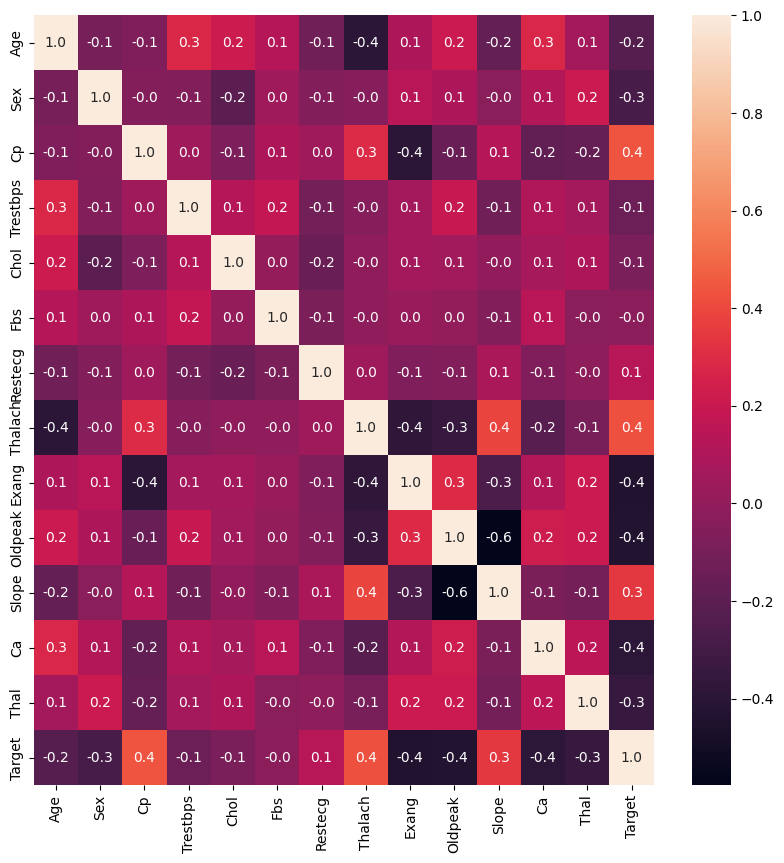

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,fmt='.1f')
plt.show()

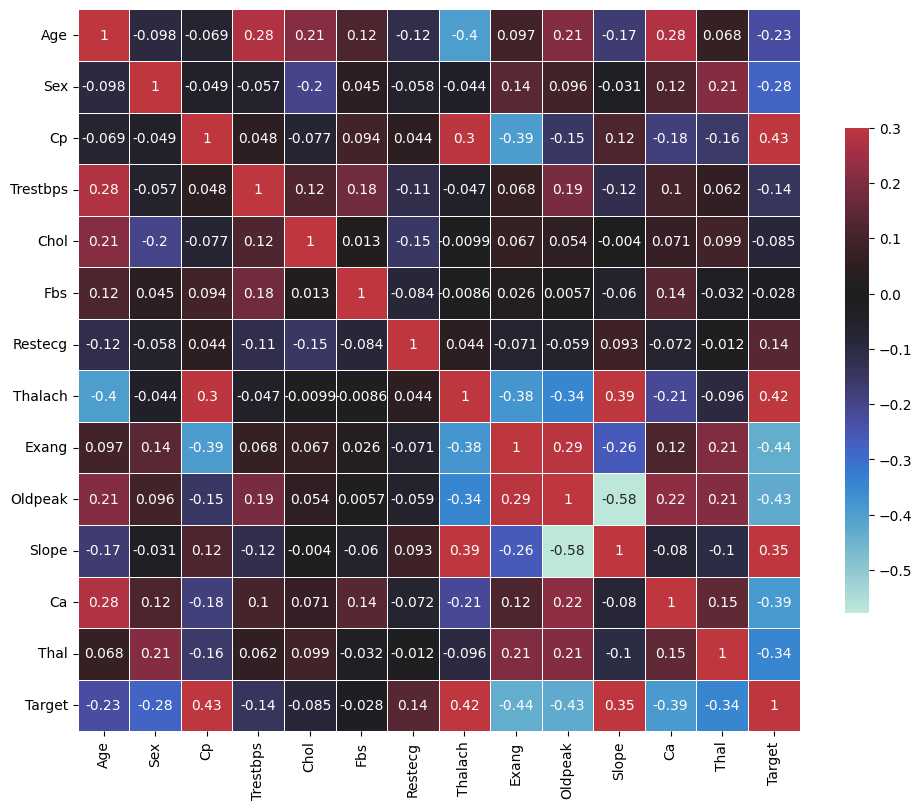

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)
plt.tight_layout()
plt.show()

<p id='4'><h3>One Visualization to Rule Them All</h3></p>

<p>We will perform analysis on the training data. The relationship between the features found in the training data is observed. In this way, comments about the properties can be made
</p>

In [ ]:
data.Age.value_counts()[:10]
#data age show value counts for age least 10

,count
Age,
58,19
57,17
54,16
59,14
52,13
51,12
62,11
60,11
44,11


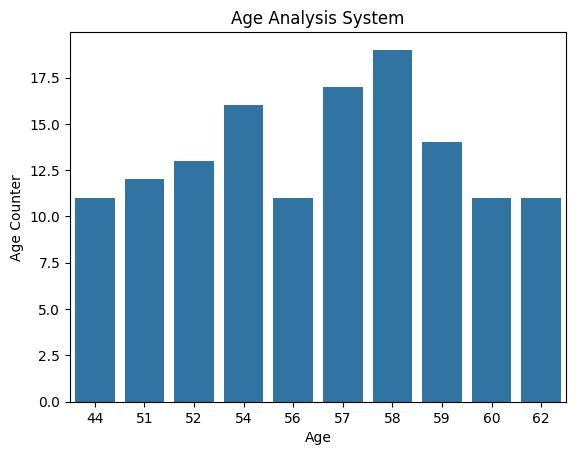

In [ ]:
sns.barplot(x=data.Age.value_counts()[:10].index,y=data.Age.value_counts()[:10].values)
plt.xlabel('Age')
plt.ylabel('Age Counter')
plt.title('Age Analysis System')
plt.show()

<p>In this section, the best analysis can be divided into the <b>elderly,middle-aged, young</b> people by looking at the age ranges.</p>

In [ ]:
#firstly find min and max ages
minAge=min(data.Age)
maxAge=max(data.Age)
meanAge=data.Age.mean()
print('Min Age :',minAge)
print('Max Age :',maxAge)
print('Mean Age :',meanAge)

Min Age : 29
Max Age : 77
Mean Age : 54.366336633663366


In [ ]:
young_ages=data[(data.Age>=29)&(data.Age<40)]
middle_ages=data[(data.Age>=40)&(data.Age<55)]
elderly_ages=data[(data.Age>55)]
print('Young Ages :',len(young_ages))
print('Middle Ages :',len(middle_ages))
print('Elderly Ages :',len(elderly_ages))

Young Ages : 16
Middle Ages : 128
Elderly Ages : 151


In [ ]:
#Let's see how the correlation values between them
data.corr()

,Age,Sex,Cp,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Slope,Ca,Thal,Target
Age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
Sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
Cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
Trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
Chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
Fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
Restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
Thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
Exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
Oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


<p>All correlation values between the data are listed in the previous sections. As a result of this listing, it is aimed to ensure that these properties are used in different places by performing different operations. Thus, the p-value process determines a hypothesis and a hypothesis thesis is presented between each characteristic according to this hypothesis. In this process, after determining the Class property as hypothesis, the relations between all the other properties are checked. This results in a different number for each property. What is important here is that these numbers are not close to 1.00. If the number is close to 1.00 this is very bad.</p>

<p>We have shown the P-value. The purpose of this value is to see the integration values between our data. The scale methods that we will do for this situation will increase this situation even higher.</p>

//resim z-score

<ul>
    <li>X is the incoming data.</li>
    <li>μ is the average value.</li>
    <li>The value of σ is the standard deviation.</li>
</ul>

//sigma resim

<p>Theoretically, it is understood that there is no big difference between standard and normalization. But when it comes to advice and usage, standard scaling comes out with a big difference. The reason for this is that the parsing process between the data is better. In the normalization system, the largest and smallest values within a group of data are considered. All other data is normalized according to these values. The aim here is to normalize the smallest value to 0 and the maximum value to 1, and all other data is a value between 0-1.</p>

//X normalization işlemi resim

<p>Of course, we need to remove the target property when doing this.</p>

In [ ]:
dataX=data.drop('Target',axis=1)
dataY=data['Target']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(dataX,dataY,test_size=0.2,random_state=42)

In [ ]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (242, 13)
X_test (61, 13)
y_train (242,)
y_test (61,)


<p><p>The difference in value between our data is too big. It increases both the volume and the results are very bad. To reduce this situation we need to use the StandardScaler function. A value of -1.1 will be obtained after using it.</p></p>

In [ ]:
#Normalization as the first process
# Normalize
X_train=(X_train-np.min(X_train))/(np.max(X_train)-np.min(X_train))
X_test=(X_test-np.min(X_test))/(np.max(X_test)-np.min(X_test))

<p>The diagonal values we see in these correlation values are always 1.0. That doesn't mean much to us. But the minus value is a big problem for me, but the value of the transactions are more valuable for us.</p>

<p>Now it is time to implement PCA to the data set.</p>

<p>But, before that, I will investigate the explained variance ratio and resulting principal components:</p>

In [ ]:
from sklearn.decomposition import PCA
pca=PCA().fit(X_train)
print(pca.explained_variance_ratio_)
print()
print(X_train.columns.values.tolist())
print(pca.components_)

[7.64858101e-01 1.41383692e-01 7.64998759e-02 1.60778240e-02
 3.49088934e-04 2.64689903e-04 2.21844793e-04 9.46662678e-05
 7.73141226e-05 5.88273577e-05 4.81873218e-05 3.90509533e-05
 2.68380297e-05]

['Age', 'Sex', 'Cp', 'Trestbps', 'Chol', 'Fbs', 'Restecg', 'Thalach', 'Exang', 'Oldpeak', 'Slope', 'Ca', 'Thal']
[[ 4.21418270e-02 -1.86563054e-03 -1.39558389e-03  5.27425161e-02
   9.97699892e-01  3.43605141e-04 -1.32487183e-03  4.81371493e-03
   3.75064650e-04  2.37593359e-03  1.75295835e-04  4.66048819e-04
   8.44069817e-04]
 [ 1.91448176e-01  4.57014650e-04 -1.27923816e-02  9.07801940e-02
  -8.23956498e-03  3.55297860e-04 -6.58591183e-04 -9.76891308e-01
   8.12318652e-03  1.71966639e-02 -8.90221830e-03  1.05707337e-02
   2.21778875e-03]
 [ 1.38800047e-01 -1.92088271e-03  4.91670732e-03  9.81384277e-01
  -5.83284361e-02  3.68755432e-03 -1.57394323e-03  1.18935229e-01
  -4.58192652e-05  4.68822294e-03 -8.55741842e-05  2.32552391e-03
  -5.61935914e-04]
 [ 9.70256176e-01 -3.19888203e-03  

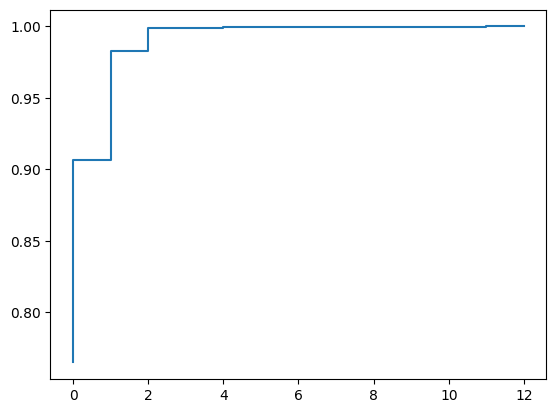

In [ ]:
cumulative=np.cumsum(pca.explained_variance_ratio_)
plt.step([i for i in range(len(cumulative))],cumulative)
plt.show()

<p>So, I will apply PCA to the data with number of components = 8.</p>

<p>The reduced data can be seen on the plotting below.</p>

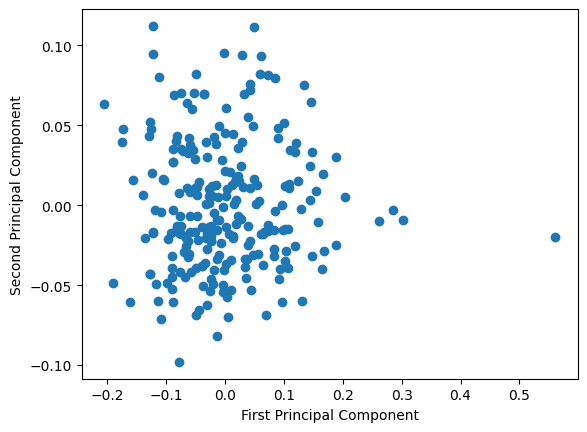

In [ ]:
pca = PCA(n_components=8)
pca.fit(X_train)
reduced_data_train = pca.transform(X_train)
#inverse_data = pca.inverse_transform(reduced_data)
plt.scatter(reduced_data_train[:, 0], reduced_data_train[:, 1], label='reduced')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

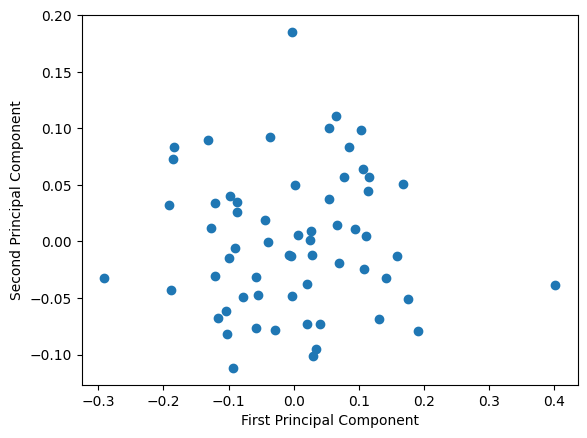

In [ ]:
pca = PCA(n_components=8)
pca.fit(X_test)
reduced_data_test = pca.transform(X_test)
#inverse_data = pca.inverse_transform(reduced_data)
plt.scatter(reduced_data_test[:, 0], reduced_data_test[:, 1], label='reduced')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

<p>According to the principal components, data points with greater values on the x-axis represent the customers that are less likely to spend to Detergents_Paper category.</p>

<p>Likewise, data points with greater values on the y-axis represent the customers that are less likely to spend to Fresh and Frozen categories.</p>

<p>Now, I can constitute a DataFrame out of my reduced data with two dimensions:</p>

In [ ]:
reduced_data_train = pd.DataFrame(reduced_data_train, columns=['Dim1', 'Dim2','Dim3','Dim4','Dim5','Dim6','Dim7','Dim8'])
reduced_data_test = pd.DataFrame(reduced_data_test, columns=['Dim1', 'Dim2','Dim3','Dim4','Dim5','Dim6','Dim7','Dim8'])
X_train=reduced_data_train
X_test=reduced_data_test

In [ ]:
def plot_roc_(false_positive_rate,true_positive_rate,roc_auc):
    plt.figure(figsize=(5,5))
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],linestyle='--')
    plt.axis('tight')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

def plot_feature_importances(gbm):
    n_features = X_train.shape[1]
    plt.barh(range(n_features), gbm.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

In [ ]:
combine_features_list=[
    ('Dim1','Dim2','Dim3'),
    ('Dim4','Dim5','Dim5','Dim6'),
    ('Dim7','Dim8','Dim1'),
    ('Dim4','Dim8','Dim5')
]

<p id='14'> <h1>K-Nearest Neighbors</h1></p>

In [ ]:
parameters=[
{
    'n_neighbors':np.arange(2,33),
    'n_jobs':[2,6]
    },
]
print("*"*50)
for features in combine_features_list:
    print("*"*50)

    X_train_set=X_train.loc[:,features]
    X_test_set=X_test.loc[:,features]

    gsknn=GridSearchCV(KNeighborsClassifier(),parameters,scoring='accuracy')
    gsknn.fit(X_train_set,y_train)
    print('Best parameters set:')
    print(gsknn.best_params_)
    print("*"*50)
    predictions = [
    (gsknn.predict(X_train_set), y_train, 'Train'),
    (gsknn.predict(X_test_set), y_test, 'Test1')
    ]
    for pred in predictions:
        print(pred[2] + ' Classification Report:')
        print("*"*50)
        print(classification_report(pred[1], pred[0]))
        print("*"*50)
        print(pred[2] + ' Confusion Matrix:')
        print(confusion_matrix(pred[1], pred[0]))
        print("*"*50)

    print("*"*50)
    basari=cross_val_score(estimator=KNeighborsClassifier(),X=X_train,y=y_train,cv=12)
    print(basari.mean())
    print(basari.std())
    print("*"*50)

**************************************************
**************************************************
Best parameters set:
{'n_jobs': 2, 'n_neighbors': 19}
**************************************************
Train Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.66      0.59      0.62       109
           1       0.69      0.75      0.72       133

    accuracy                           0.68       242
   macro avg       0.67      0.67      0.67       242
weighted avg       0.68      0.68      0.68       242

**************************************************
Train Confusion Matrix:
[[ 64  45]
 [ 33 100]]
**************************************************
Test1 Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.69      0.69      0.69        29
           1       0.72      0.72      0.72     

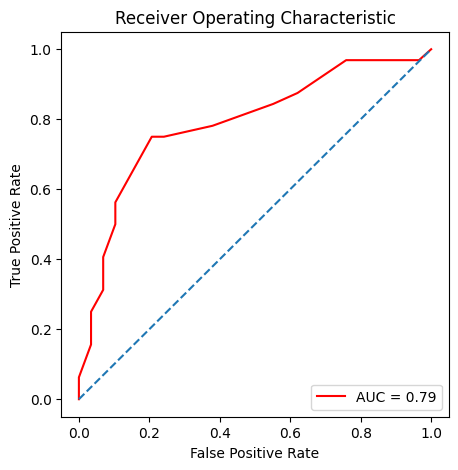

Accurancy Oranı : 0.7540983606557377
KNN TRAIN score with  0.6694214876033058
KNN TEST score with  0.7540983606557377

[[22  7]
 [ 8 24]]


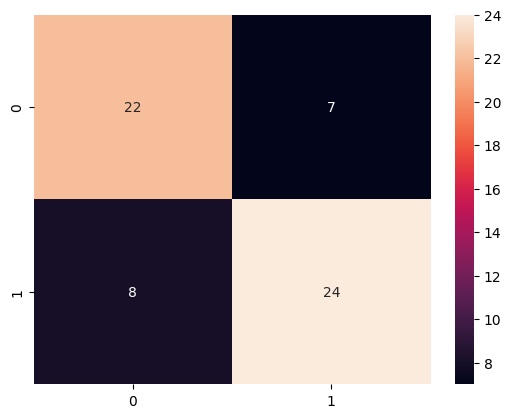

In [ ]:
knn=KNeighborsClassifier(n_jobs=2, n_neighbors=22)
knn.fit(X_train,y_train)

y_pred=knn.predict(X_test)

y_proba=knn.predict_proba(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)
plot_roc_(false_positive_rate,true_positive_rate,roc_auc)

from sklearn.metrics import r2_score,accuracy_score

print('Accurancy Oranı :',accuracy_score(y_test, y_pred))
print("KNN TRAIN score with ",format(knn.score(X_train, y_train)))
print("KNN TEST score with ",format(knn.score(X_test, y_test)))
print()

cm=confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,annot=True)
plt.show()

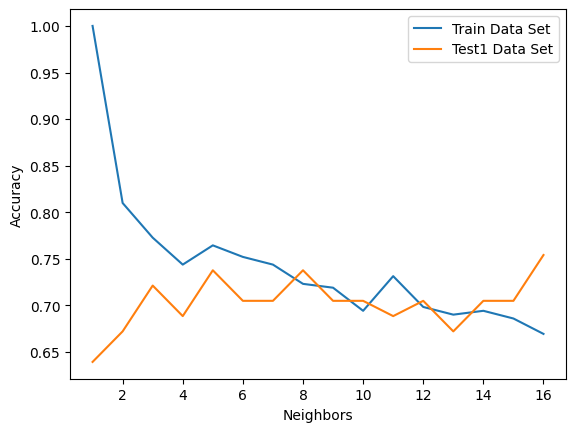

In [ ]:
n_neighbors = range(1, 17)
train_data_accuracy = []
test1_data_accuracy = []
for n_neigh in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=n_neigh,n_jobs=5)
    knn.fit(X_train, y_train)
    train_data_accuracy.append(knn.score(X_train, y_train))
    test1_data_accuracy.append(knn.score(X_test, y_test))
plt.plot(n_neighbors, train_data_accuracy, label="Train Data Set")
plt.plot(n_neighbors, test1_data_accuracy, label="Test1 Data Set")
plt.ylabel("Accuracy")
plt.xlabel("Neighbors")
plt.legend()
plt.show()

In [ ]:
n_neighbors = range(1, 17)
k_scores=[]
for n_neigh in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=n_neigh,n_jobs=5)
    scores=cross_val_score(estimator=knn,X=X_train,y=y_train,cv=12)
    k_scores.append(scores.mean())
print(k_scores)

[0.5867063492063491, 0.521031746031746, 0.6117063492063491, 0.6069444444444444, 0.6242063492063493, 0.6279761904761905, 0.656547619047619, 0.6521825396825396, 0.6488095238095237, 0.6198412698412699, 0.6408730158730159, 0.6242063492063491, 0.6367063492063493, 0.6371031746031746, 0.6285714285714286, 0.6408730158730159]


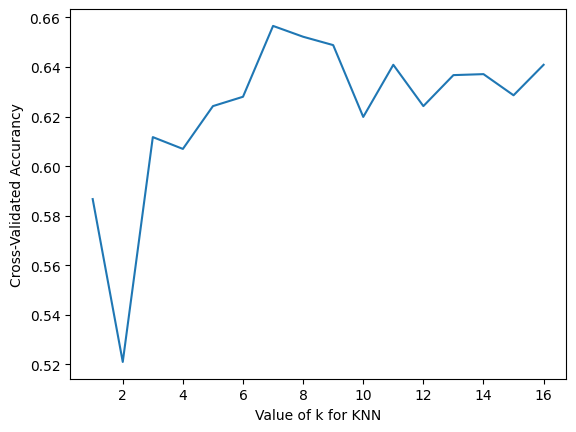

In [ ]:
plt.plot(n_neighbors,k_scores)
plt.xlabel('Value of k for KNN')
plt.ylabel("Cross-Validated Accurancy")
plt.show()